In [37]:
import statsbomb as sb
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects

from mplsoccer import Pitch, Sbopen,VerticalPitch

In [29]:
events = sb.Events(event_id='3775628')
df = events.get_dataframe(event_type='shot')
df = df[df['period']!=5].copy()

In [58]:
events = sb.Events(event_id='3775628')
df = events.get_dataframe(event_type='pass')
df = df[df['period']!=5].copy()

In [61]:
man_utd = df[df['possession_team'] == 'Manchester United']

In [40]:
path_eff = [path_effects.Stroke(linewidth=2, foreground='white'),
            path_effects.Normal()]

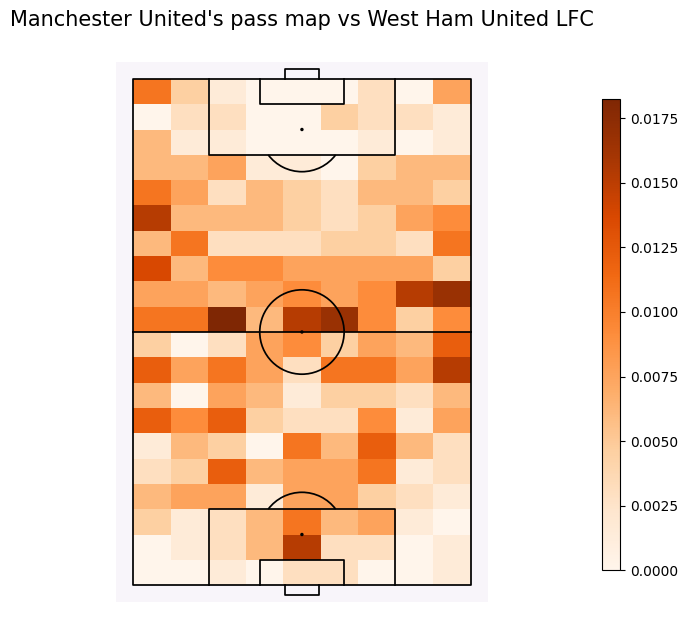

In [70]:
pitch = VerticalPitch(line_zorder=2, line_color='black',
                  pitch_color='#f8f5fa', half = False, goal_type='box', linewidth = 1.25)

fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,endnote_height=0.04, title_space=0, endnote_space=0)

#get the 2D histogram
bin_statistic = pitch.bin_statistic(man_utd['start_location_x'], man_utd['start_location_y'], statistic='count', bins=(20, 9), normalize=True)

#make a heatmap
pcm  = pitch.heatmap(bin_statistic, cmap='Oranges', edgecolor='none', ax=ax['pitch'])

#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)

#labels = pitch.label_heatmap(bin_statistic, color='#111', fontsize=12,
#                                 ax=ax['pitch'], ha='center', va='center',
#                                 str_format='{:.0%}', path_effects=path_eff
#                                )

# plt.title("Manchester United's shot map vs West Ham United LFC")
fig.text(0.5,1,"Manchester United's pass map vs West Ham United LFC",size=15,ha='center')

fig.set_figwidth(6)
fig.set_figheight(6)
plt.show()